<a href="https://colab.research.google.com/github/Daelres/Apuntes_Clase_Inteligencia_artificial/blob/main/Proyecto_colesterol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/pacientes.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas para inspeccionar los datos
df.head()
df.describe()

,edad,colesterol,problema_cardiaco
count,300.000000,300.000000,302.000000
mean,54.303333,247.280000,0.493377
std,9.090661,51.855681,0.500786
min,29.000000,126.000000,0.000000
25%,47.000000,211.750000,0.000000
50%,55.000000,242.500000,0.000000
75%,61.000000,275.250000,1.000000
max,77.000000,564.000000,1.000000


In [10]:
#En este paso vamos a determinar si hay nulos
df.isnull().sum()

,0
edad,0
colesterol,0
problema_cardiaco,0


In [4]:
#Vamos a determinar los estadisticos de DataFrame
df.describe()

,edad,colesterol,problema_cardiaco
count,300.000000,300.000000,302.000000
mean,54.303333,247.280000,0.493377
std,9.090661,51.855681,0.500786
min,29.000000,126.000000,0.000000
25%,47.000000,211.750000,0.000000
50%,55.000000,242.500000,0.000000
75%,61.000000,275.250000,1.000000
max,77.000000,564.000000,1.000000


In [6]:
#Determine la estadistica de las variables objeto del DataFrame
df.describe(include=['object'])

There are no 'object' type columns in the DataFrame.


In [8]:
#Agregue la información del dataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   edad               300 non-null    float64
 1   colesterol         300 non-null    float64
 2   problema_cardiaco  302 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.2 KB


In [11]:
#Imputar la mediana a las varibales edad y colesterol

# Imputar la mediana a la variable edad
df['edad'].fillna(df['edad'].median(), inplace=True)

# Imputar la mediana a la variable colesterol
df['colesterol'].fillna(df['colesterol'].median(), inplace=True)

# Verificar que no haya valores nulos en las variables edad y colesterol
print(df[['edad', 'colesterol']].isnull().sum())


edad          0
colesterol    0
dtype: int64


<ipython-input-11-489afe548523>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['edad'].fillna(df['edad'].median(), inplace=True)
<ipython-input-11-489afe548523>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [13]:
#Se verifica que ya no se tienen nulos
df.isnull().sum()

,0
edad,0
colesterol,0
problema_cardiaco,0


In [17]:
#Se normalizan las columnas edad y colesterol

# Normalizar las columnas edad y colesterol utilizando Min-Max scaling
for column in ['edad', 'colesterol']:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Verificar que no haya valores nulos en las variables edad y colesterol
print(df[['edad', 'colesterol']].isnull().sum())

#Se verifica que ya no se tienen nulos
df.isnull().sum()


edad          0
colesterol    0
dtype: int64


,0
edad,0
colesterol,0
problema_cardiaco,0


In [21]:
df

,edad,colesterol,problema_cardiaco
0,63.0,233.0,1
1,55.0,250.0,0
2,37.0,250.0,0
3,41.0,204.0,0
4,56.0,236.0,1
...,...,...,...
297,63.0,187.0,0
298,63.0,197.0,0
299,59.0,176.0,0
300,57.0,241.0,1


In [22]:
#Se Normalizan las columnas edad y colesterol con SkLearn

from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar las columnas 'edad' y 'colesterol'
df[['edad', 'colesterol']] = scaler.fit_transform(df[['edad', 'colesterol']])

# Verificar los datos normalizados
print(df[['edad', 'colesterol']])


         edad  colesterol
0    0.708333    0.244292
1    0.541667    0.283105
2    0.166667    0.283105
3    0.250000    0.178082
4    0.562500    0.251142
..        ...         ...
297  0.708333    0.139269
298  0.708333    0.162100
299  0.625000    0.114155
300  0.583333    0.262557
301  0.333333    0.315068

[302 rows x 2 columns]


In [23]:
#Se da persistencia al modelo del escalador con Joblib

from joblib import dump, load

# Guardar el modelo del escalador con Joblib
dump(scaler, 'Scaler.joblib')


['Scaler.joblib']

In [26]:
#Se muestra la foema on shape del dataframe df
df.shape

(302, 3)

In [30]:
#Se dividen los features que son edad y colestarol, y se deja la etiqueta problemas_cardiacos

# Seleccionar las características (edad y colesterol) y la etiqueta (problemas_cardiacos)
X = df[['edad', 'colesterol']]
y = df['problema_cardiaco']


In [33]:
#Se dividen los datos de entrenamiento con los datos de prueba, se fija la semilla en 42, además, haga el stratify

from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Tamaño del conjunto de entrenamiento: 241
Tamaño del conjunto de prueba: 61


In [36]:
#Se verifica la cantidad de datos que quedan en entrenamiento y en prueba
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))

Tamaño del conjunto de entrenamiento: 241
Tamaño del conjunto de prueba: 61


##Entrenamiento del Modelo con Naive Bayes

In [37]:
#Con los datos de entrenamiento se entrena un modelo de Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Crear un modelo de Naive Bayes
nb_model = GaussianNB()

# Entrenar el modelo con los datos de entrenamiento
nb_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = nb_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Mostrar un informe de clasificación
print(classification_report(y_test, y_pred))

# Guardar el modelo entrenado con Joblib
dump(nb_model, 'NaiveBayesModel.joblib')


Precisión del modelo: 0.7540983606557377
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        31
           1       0.76      0.73      0.75        30

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



['NaiveBayesModel.joblib']

##Entrenamiento del modelo KNN

In [38]:
#Con los datos de entrenamiento se entrena un modelo de KNN

from sklearn.neighbors import KNeighborsClassifier

# Crear un modelo KNN con k=5 (puedes ajustar este valor)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_knn = knn_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Precisión del modelo KNN:", accuracy_knn)

# Mostrar un informe de clasificación
print(classification_report(y_test, y_pred_knn))

# Guardar el modelo entrenado con Joblib
dump(knn_model, 'KNNModel.joblib')


Precisión del modelo KNN: 0.819672131147541
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.81      0.83      0.82        30

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



['KNNModel.joblib']

##Entrenamiendo del modelo maquina de soporte vectorial de clasificación

In [39]:
#Con los datos de entrenamiento se entrena un modelo de soporte vectorial de clacificación (SVC)

from sklearn.svm import SVC

# Crear un modelo SVC
svc_model = SVC(kernel='linear', random_state=42)  # Puedes cambiar el kernel (linear, rbf, poly, etc.)

# Entrenar el modelo con los datos de entrenamiento
svc_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_svc = svc_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Precisión del modelo SVC:", accuracy_svc)

# Mostrar un informe de clasificación
print(classification_report(y_test, y_pred_svc))

# Guardar el modelo entrenado con Joblib
dump(svc_model, 'SVCModel.joblib')


Precisión del modelo SVC: 0.7377049180327869
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        31
           1       0.77      0.67      0.71        30

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



['SVCModel.joblib']

##Se realizan predicciones con el modelo de Naive Bayes

In [44]:
# prompt: Se realizan predicciones con el modelo de Naive Bayes con los datos de prueba

import pandas as pd
# Cargar el modelo de Naive Bayes entrenado
nb_model = load('NaiveBayesModel.joblib')

# Crear nuevos datos de prueba (ejemplo)
new_data = pd.DataFrame(X_test)

# Realizar predicciones con el modelo cargado
predictions = nb_model.predict(new_data)

# Mostrar las predicciones
print("Predicciones:", predictions)

# Mostrar la cantidad de datos
print("Cantidad de datos:", len(new_data))


Predicciones: [0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0
 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1]
Cantidad de datos: 61


In [47]:
#Se muestra el Y train en formato arreglo
y_test.to_numpy()
print(len(y_test.to_numpy()))

61


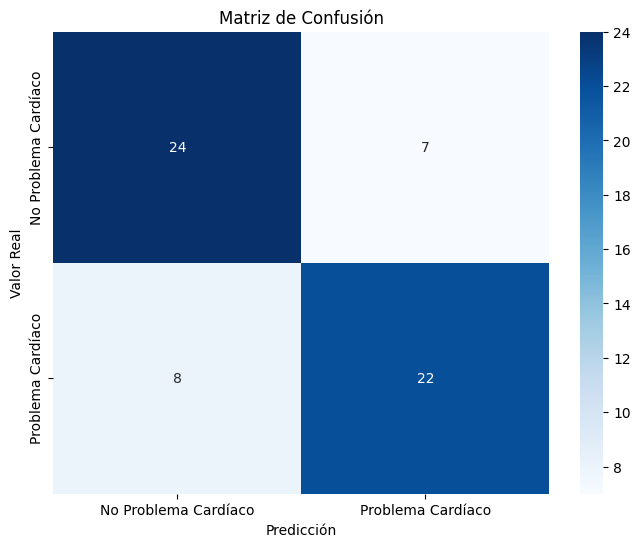

In [49]:
#Se muestra utilizando sea born la matriz de confusión de la predicción y del valor de la etiqueta de entrenamiento

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Problema Cardíaco', 'Problema Cardíaco'],
            yticklabels=['No Problema Cardíaco', 'Problema Cardíaco'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


Llegaron tres pacientes nuevos, el primer paciente tiene 38 añis de edad con un colesterol de 170, el segundo paciente tiene una edad de 65 años con un colesterol de 235, el tercer paciente tiene una edad de 42 años con un colesterol de 180.
Haga las preducciones y determine cuales pacientes sufren o sufriran del corazón

In [51]:
# Llegaron tres pacientes nuevos, el primer paciente tiene 38 años de edad con un colesterol de 170, el segundo paciente tiene una edad de 65 años con un colesterol de 235, el tercer paciente tiene una edad de 42 años con un colesterol de 180. Haga las preducciones y determine cuales pacientes sufren o sufriran del corazón

import pandas as pd
# Cargar el modelo de Naive Bayes entrenado
nb_model = load('NaiveBayesModel.joblib')

# Cargar el escalador
scaler = load('Scaler.joblib')

# Datos de los nuevos pacientes
new_patients_data = pd.DataFrame({
    'edad': [38, 65, 42],
    'colesterol': [170, 235, 180]
})

# Normalizar los datos de los nuevos pacientes usando el mismo escalador que se utilizó para el entrenamiento
new_patients_data[['edad', 'colesterol']] = scaler.transform(new_patients_data[['edad', 'colesterol']])

# Realizar predicciones con el modelo cargado
predictions = nb_model.predict(new_patients_data)

# Mostrar las predicciones
print("Predicciones para los nuevos pacientes:", predictions)

# Interpretar las predicciones
for i, prediction in enumerate(predictions):
  if prediction == 1:
    print(f"El paciente {i+1} sufere del corazón.")
  else:
    print(f"El paciente {i+1} no suffre del corazón.")


Predicciones para los nuevos pacientes: [0 1 0]
El paciente 1 no suffre del corazón.
El paciente 2 sufere del corazón.
El paciente 3 no suffre del corazón.
